## Loading curves
### 1 - Starting point

In [1]:
% matplotlib inline
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
sys.path.append(r'C:\Users\MoAda\Documents\Physics\FP\F20-MagnetoOpticTrap')

In [2]:
import lib.constants as c
import matplotlib.pyplot as plt

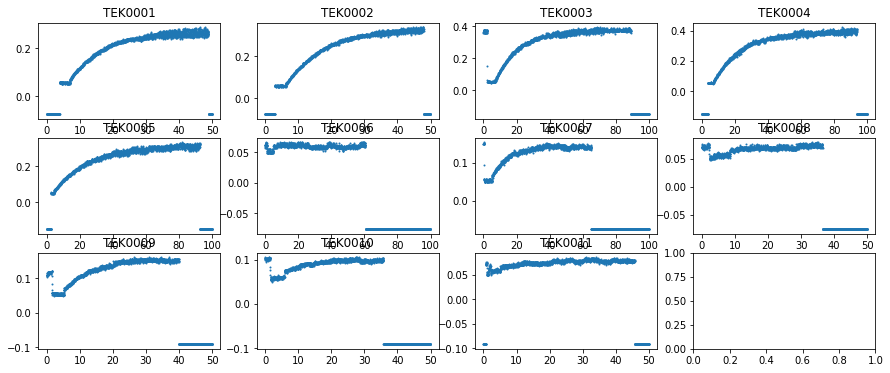

In [3]:
from lib.parse_plot_data import make_oscilloscope_df, plot_dfs
dfs = make_oscilloscope_df(c.loading_path)
fig, axes = plot_dfs(dfs)
plt.show(fig)

### 2 - Filtering values that are equal to the minimum value

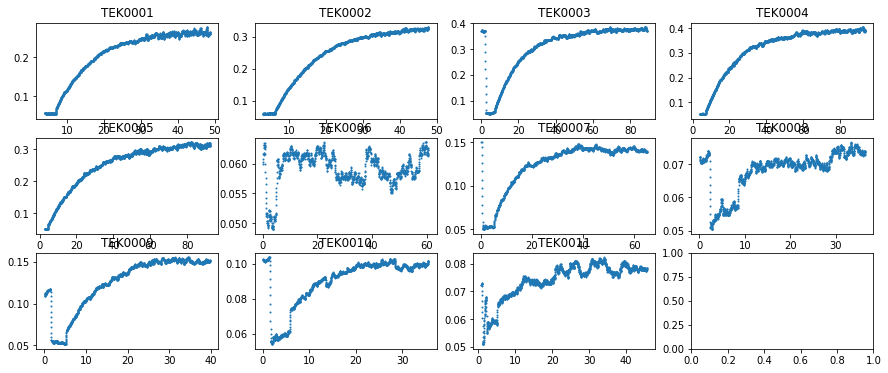

In [4]:
from lib.filter_data import filter_loading
dfs = filter_loading(dfs, rolling=10)
fig, axes = plot_dfs(dfs)
plt.show(fig, block=True)

### 3 - Fitting loading curves

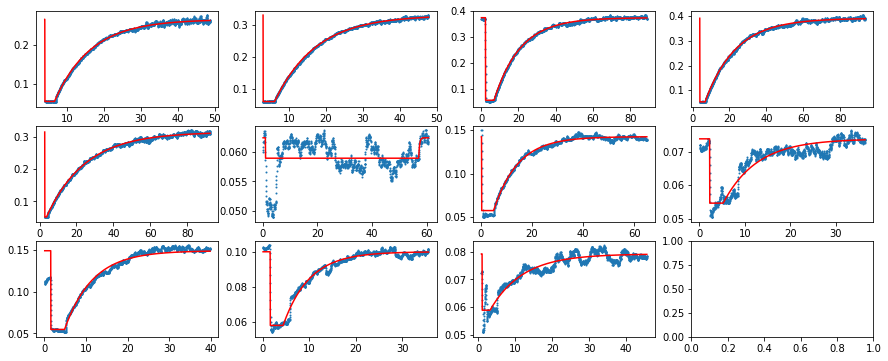

              amp   amp_err  offset  offset_err        tau   tau_err    redchi
file                                                                          
TEK0001  0.210827  0.000554       0         0.0   9.781973  0.056024  0.000030
TEK0002  0.271699  0.000592       0         0.0  11.176952  0.058825  0.000038
TEK0003  0.319500  0.000738       0         0.0  14.069141  0.066749  0.000054
TEK0004  0.337758  0.001061       0         0.0  16.653928  0.085278  0.000071
TEK0005  0.263591  0.001466       0         0.0  21.033111  0.118627  0.000048
TEK0006  0.003416  0.000303       0         0.0   0.323332  0.315896  0.000008
TEK0007  0.084597  0.000441       0         0.0   9.488749  0.119732  0.000019
TEK0008  0.019324  0.000000       0         NaN   7.440560       NaN  0.000005
TEK0009  0.094011  0.000681       0         0.0   6.721617  0.122398  0.000059
TEK0010  0.041891  0.000195       0         0.0   5.617995  0.064531  0.000004
TEK0011  0.020391  0.000218       0         0.0   8.

In [5]:
from lib.fit_data import fit_loading_dfs
from lib.parse_plot_data import plot_dfs_with_fits
dfs_fit, fit_df = fit_loading_dfs(dfs, offset_on=False)
fig, axes = plot_dfs_with_fits(dfs_fit)
plt.show(fig)
print(fit_df)

### Release, Recapture

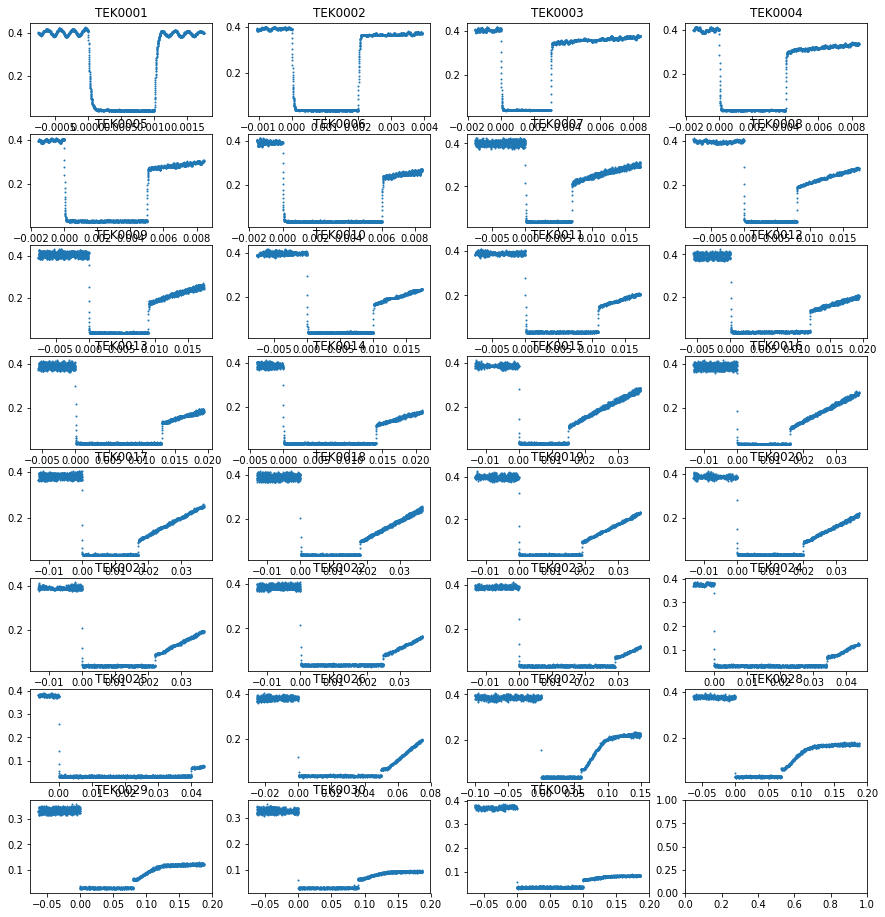

In [6]:
dfs_rr = make_oscilloscope_df(c.temperature_path)
fig, axes = plot_dfs(dfs_rr)
plt.show()

### Fit of Release, Recapture

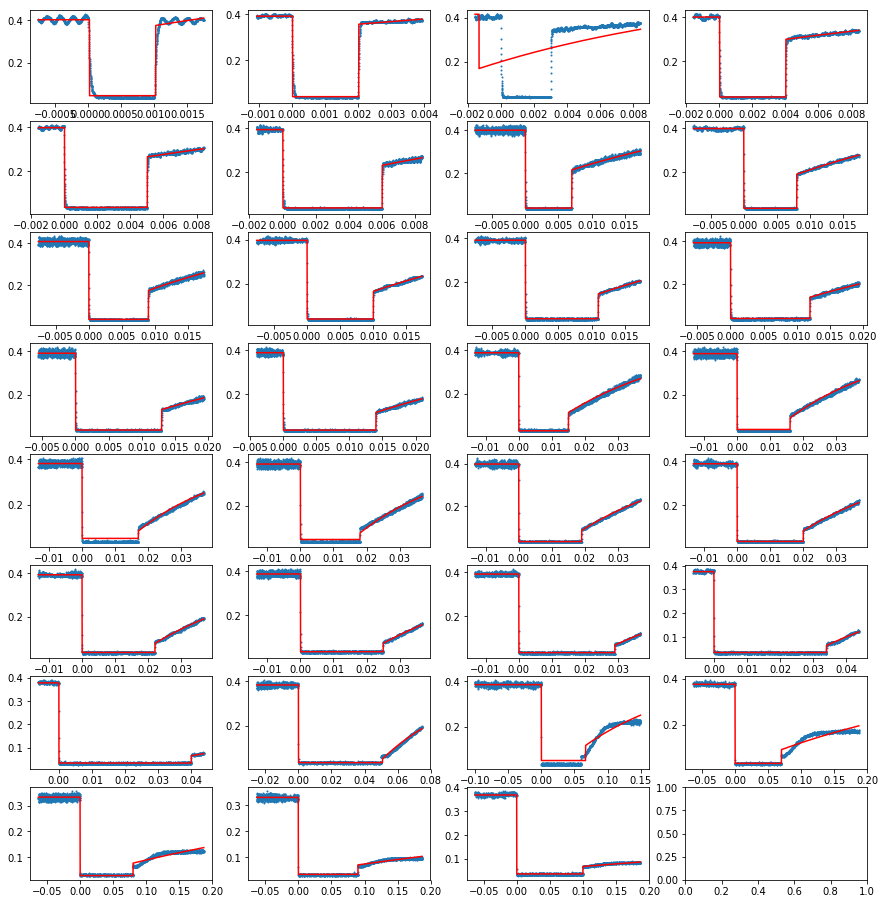

              amp  amp_err    offset offset_err       tau tau_err    redchi
file                                                                       
TEK0001  0.357452        0  0.330551       None  0.007099    None  0.000520
TEK0002  0.352162        0  0.317206       None  0.029885    None  0.000231
TEK0003  0.384000        0  0.136209       None  0.015527    None  0.019220
TEK0004  0.361292        0  0.260836       None  0.037345    None  0.000111
TEK0005  0.360225        0  0.228578       None  0.031902    None  0.000105
TEK0006  0.353641        0  0.192378       None  0.023836    None  0.000104
TEK0007  0.363017        0  0.178139       None  0.037431    None  0.000094
TEK0008  0.360360        0  0.153499       None  0.034079    None  0.000042
TEK0009  0.370037        0  0.137521       None  0.032707    None  0.000086
TEK0010  0.359084        0  0.126438       None  0.034647    None  0.000049
TEK0011  0.354622        0  0.111687       None  0.034636    None  0.000043
TEK0012  0.3

In [7]:
dfs_fit_rr, fit_df_rr = fit_loading_dfs(dfs_rr, offset_on=True)
fig, axes = plot_dfs_with_fits(dfs_fit_rr)
plt.show(fig)
print(fit_df_rr)

## Spectroscopy
### 1 - Loading spectroscopy data

In [8]:
from lib.parse_plot_data import make_spectroscopy_df, plot_dfs_spectroscopy
dfs_spec = make_spectroscopy_df(c.spectroscopy_path)
#fig, axes = plot_dfs_spectroscopy(dfs_spec, max_column_number=3, plot_PDH_out=True, plot_fit=False)
#plt.show()

### 2 - Calibrating the frequency scale

[[Model]]
    (((((Model(gaussian, prefix='gauss1_') + Model(gaussian, prefix='gauss2_')) + Model(linear, prefix='linear1_')) + Model(gaussian, prefix='gauss3_')) + Model(linear, prefix='linear2_')) + Model(gaussian, prefix='gauss4_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 453
    # data points      = 902
    # variables        = 20
    chi-square         = 0.02000590
    reduced chi-square = 2.2682e-05
    Akaike info crit   = -9626.14080
    Bayesian info crit = -9530.04851
[[Variables]]
    gauss1_amp:        -0.03133896 +/- 1.6678e-04 (0.53%) (init = -0.2)
    gauss1_cen:        -0.63038859 +/- 2.2948e-04 (0.04%) (init = -0.6)
    gauss1_sig:         0.05510951 +/- 3.1305e-04 (0.57%) (init = 0.1)
    gauss1_off:        -55.3286357 +/- 4819.43753 (8710.57%) (init = 0.6)
    gauss2_amp:        -0.06175018 +/- 1.4159e-04 (0.23%) (init = -0.4)
    gauss2_cen:        -0.38548034 +/- 1.1056e-04 (0.03%) (init = -0.4)
    gauss2_sig:         0.0540443

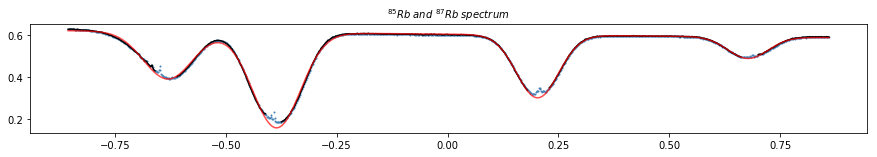

calibration factor: 1.3074801270816776, zero definition: -0.6303885884753954
multiplet df           separation in frequency [GHz]  separation error [GHz]
87f287f1                       6.834683                0.003718
87f285f3                       1.280226                0.001420
85f285f3                       3.075845                0.001559
85f287f1                       2.478611                0.002660


In [9]:
from lib.util import mask_dfs, get_definition_zero, get_multiplet_df, get_multiplet_separation
dfs_compl_spec = dfs_spec[8:]
dfs_compl_spec = mask_dfs(dfs_compl_spec, all_masks=[[(-0.66, -0.61), (-0.41, -0.375),
                                                      (0.18, 0.23), (0.66, 0.7)]])

params = [(-0.2, -0.4, -0.3, -0.1,
           -0.6, -0.4, 0.23, 0.7,
           0.1, 0.1, 0.1, 0.1,
           0.6, 0.6, 0.6, 0.6,
           0.7, 0.7,
           -0.004, -0.004)]

dfs_compl_spec, fit_df_compl_spec = fit_spectroscopy_dfs(dfs_compl_spec,
                                                         fct='poly_gaussian',
                                                         all_init_params=params)

fig, axes = plot_dfs_spectroscopy(dfs_compl_spec, max_column_number=1, plot_PDH_out=False, plot_fit=True)
plt.show()

calibration_factor, calibration_factor_err = get_multiplet_separation(fit_df_compl_spec, 1, 4)
definition_zero, definition_zero_error = get_definition_zero(fit_df_compl_spec)

print('calibration factor: {}, zero definition: {}'.format(calibration_factor, definition_zero))
df_multiplet_sep = get_multiplet_df(fit_df_compl_spec)

### Gaussian fits of the transitions (unzoomed)

In [10]:
from lib.filter_data import filter_zoomed_spectroscopy, calibrate_voltage_to_freq_scale
dfs_spec = dfs_spec
dfs_spec = filter_zoomed_spectroscopy(dfs_spec, return_zoomed=False, return_entire=False)
dfs_spec = calibrate_voltage_to_freq_scale(dfs_spec,
                                           calibration_factor=calibration_factor,
                                           definition_zero=definition_zero)
dfs_spec = mask_dfs(dfs_spec, all_masks=[[(0., 3.25), (3.85, 4.05)],
                                         [(1.25, 1.7), (2.05, 2.3)],
                                         [(6.05, 6.45)],
                                         [(-0.6, -0.2), (1.2, 1.3)]])

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 297
    # data points      = 747
    # variables        = 4
    chi-square         = 0.00315340
    reduced chi-square = 4.2441e-06
    Akaike info crit   = -9236.37956
    Bayesian info crit = -9217.91530
[[Variables]]
    amp: -0.20642725 +/- 2.7414e-04 (0.13%) (init = 0.61703)
    cen:  3.91543504 +/- 1.6360e-04 (0.00%) (init = 4.755749)
    sig:  0.26899772 +/- 3.0393e-04 (0.11%) (init = 0.9084124)
    off:  0.62001442 +/- 1.8835e-04 (0.03%) (init = 4.81048)
[[Correlations]] (unreported correlations are < 0.250)
    C(amp, off) = -0.908
    C(sig, off) =  0.789
    C(amp, sig) = -0.783

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 280
    # data points      = 605
    # variables        = 4
    chi-square         = 0.06166587
    reduced chi-square = 1.0261e-04
    Akaike info crit   = -5552.70814
    Bayesian info c

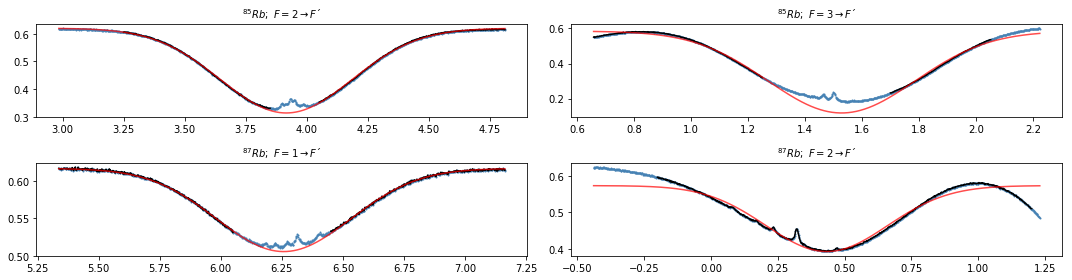

           amp   amp_err       cen   cen_err       sig   sig_err       off  \
file                                                                         
85f2 -0.206427  0.000274  3.915435  0.000164  0.268998  0.000304  0.620014   
85f3 -0.302431  0.001372  1.527919  0.000645  0.258805  0.001271  0.584379   
87f1 -0.076021  0.000114  6.257563  0.000241  0.274527  0.000500  0.616345   
87f2  0.102401  0.001547  0.433613  0.001651 -0.227169  0.002604  0.573067   

       off_err        redchi  
file                          
85f2  0.000188  4.244139e-06  
85f3  0.000965  1.026054e-04  
87f1  0.000075  9.810361e-07  
87f2  0.001186  2.054984e-04  


In [11]:
from lib.fit_data import fit_spectroscopy_dfs
dfs_spec, fit_df_spec = fit_spectroscopy_dfs(dfs_spec, fct='gaussian')
fig, axes = plot_dfs_spectroscopy(dfs_spec, max_column_number=2, plot_PDH_out=False, plot_fit=True)
plt.show()
print(fit_df_spec)